In [4]:
%load_ext autoreload
%autoreload 2

import sys

sys.path.append("../..")

import seaborn as sns

from xlstm_scaling_laws.analysis.parametric_sclaw_fit.run_fit_grid import (
    load_combined_fit_grid_df,
)

from xlstm_scaling_laws.analysis.tokenparam.plot_pareto_frontier import (
    get_pareto_frontier_single_plot,
)
from plot_config import savefig

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Compare mLSTM vs. Llama: Pareto-Frontier

In [2]:
# save_dir_fit_results = "/home/max/myrepos/nxai_public/xlstm_scaling_laws/outputs_lnd_fits/all_fit_grids"
# save_dir_fit_results = "/home/max/myrepos/nxai_public/xlstm_scaling_laws/outputs_lnd_fits/2025-05-06_23-09-08__first_fits"
# data_dir_lnd_fits = "/home/max/myrepos/nxai_public/xlstm_scaling_laws/data_lnd_fits"
data_dir_lnd_fits = "../../data_lnd_fits"

[[2.80967914e+18 3.27811036e+00]
 [4.01382734e+18 3.21027375e+00]
 [5.61935828e+18 3.15412370e+00]
 [6.42212374e+18 3.13750794e+00]
 [2.29096387e+19 2.89573740e+00]
 [4.12373496e+19 2.82995372e+00]
 [9.84186801e+19 2.73519358e+00]
 [1.77153624e+20 2.66695771e+00]
 [2.71399550e+20 2.61016357e+00]
 [5.25836628e+20 2.53975541e+00]
 [1.08799732e+21 2.45276810e+00]
 [2.10799481e+21 2.38784679e+00]
 [6.44548811e+21 2.25338851e+00]
 [1.23821219e+22 2.20732680e+00]
 [3.07008776e+22 2.14801079e+00]
 [8.48090541e+22 2.10295093e+00]]
[[4.41645474e+18 3.29848544e+00]
 [6.30922106e+18 3.22000082e+00]
 [8.83290948e+18 3.16278586e+00]
 [1.00947537e+19 3.14374950e+00]
 [2.27131958e+19 3.05073298e+00]
 [3.52572469e+19 2.96187983e+00]
 [6.34630445e+19 2.85250871e+00]
 [1.33726727e+20 2.77840027e+00]
 [2.40708109e+20 2.69891413e+00]
 [3.47085241e+20 2.63402503e+00]
 [6.72477654e+20 2.56296211e+00]
 [1.34180028e+21 2.48585782e+00]
 [2.59973805e+21 2.40721205e+00]
 [7.40317077e+21 2.27840353e+00]
 [1.41244

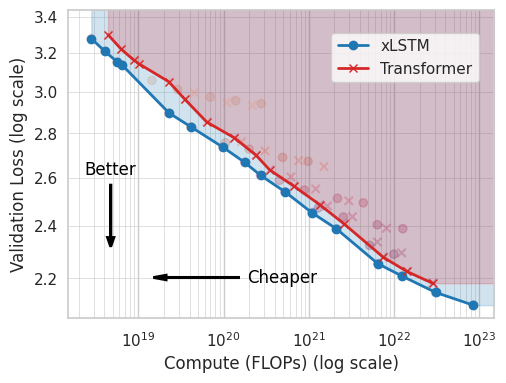

In [12]:
df = load_combined_fit_grid_df(
            save_dir=data_dir_lnd_fits,
            use_logsumexp=True,
            huber_delta=1e-3, #1e-5, #5.0,#1e-5,#5.0,
            fit_gamma=True, # True, False
            context_length=8192,
        )
with sns.plotting_context("notebook", font_scale=1.0):
    with sns.axes_style("whitegrid"):
        fig = get_pareto_frontier_single_plot(
            combined_fit_grid_df=df,
            experiment_set_fit="tokenparam", # "all", "tokenparam", "isoflop"
            experiment_set_plot_data_points="tokenparam",
            x_axis_mode="num_flops",
        )

In [13]:
savefig(fig, filename="pareto_frontier_single_plot_llama_mlstm")